# Comparing results between bw2 and our own code without separating use and construction

In [1]:
import pandas as pd
import numpy as np

In [189]:
wind_bw = pd.read_csv("../ES_MOO_validation/AB_results/WT-2-MW_LCIA-results.csv")

In [23]:
from func import *

In [4]:
# Results from ecos_sep_constr_use
R_long_tot_constr = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_constr.csv")
R_long_tot_use = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_use.csv")
midpoint_categories, endpoint_categories_HH, endpoint_categories_EQ = impact_categories(R_constr=R_long_tot_constr, R_use=R_long_tot_use)

In [5]:
run pickle_reader_function.py

In [32]:
def plot_comparison_bis(df_comparison, save):
    plt.rcParams["axes.axisbelow"] = False
    plt.bar(x = np.linspace(0, df_comparison.shape[0], df_comparison.shape[0]),
            height=100*df_comparison.delta, tick_label = list(df_comparison["Impact category"]), alpha=0.50)
    plt.ylabel("Difference between Brightway\nand ES_MOO values [%]")
    plt.grid(visible=False)
    plt.xticks(rotation=90, va="bottom")
    plt.tick_params(axis="x",direction="in", pad=-10)
    if save:
        df_name = get_df_name(df=df_comparison)
        plt.savefig(f"pics/{df_name}.pdf", format="pdf")
    plt.show()

In [6]:
eco = read_pickle_file(r'C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\dataframes\ecospold2matrix\ecoinvent3.8.cut-offPandas_symmNorm.gz.pickle')

In [7]:
eco_A = eco['A']
eco_A = eco_A.fillna(0)
display(eco_A)

index,b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,b8a3ca13-9b30-4971-9809-bfe00449eb49_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,447b52c3-fb20-495c-ade2-2b79c8ac130e_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,2565980c-9db0-480c-85c2-08a51f35390f_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,e5760adb-d2f0-4baa-a85a-2b8473ebaf3d_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,dfa5f12d-7f3c-4b98-ae94-cc56c6f70d89_a235b2ff-3237-44b0-a445-b852376a1939,dfa5f12d-7f3c-4b98-ae94-cc56c6f70d89_d7f544d6-c372-4fc3-81ae-44aa3614c9fc,af76617f-978e-426e-a13e-d38e599dcc80_a235b2ff-3237-44b0-a445-b852376a1939,af76617f-978e-426e-a13e-d38e599dcc80_d7f544d6-c372-4fc3-81ae-44aa3614c9fc,ab75880b-d311-45dc-ac14-a5776aced382_692b4f7e-9e79-4f69-b22f-b66f68f2f9cc,...,a8384a9d-660e-4b3c-95bf-278505b53fd3_fd27af60-7b68-4549-bf35-022eacd74f93,9210586d-b63c-4cd2-8539-81365d226883_ad38bbd2-e41c-4509-9dc3-c5c708a36606,95c3d53f-defc-4107-947d-244c9a6d57ec_2cb0d6c6-349c-46fc-b31f-a036c847a267,05c331cc-e200-4380-9d0a-d2cce6edb706_ce165995-6d94-44a8-ac3b-d5860c2c7fdb,b6c373ca-6cc9-409e-880f-5860dd1c0961_b3184435-d00c-5713-823d-5ff6741bfbbc,310fd9fe-8ad2-4be7-90fa-f8a784920210_d13ae29b-7d6a-55d2-8380-86343a80fed8,e55ecdcd-1c17-4ef3-9012-79de81a33742_ed25f589-c6c8-56a7-a518-b01dd3e8a453,b9b49ac3-e5df-4570-b274-714780d5467a_101e55f2-2da0-528b-96fd-21687e242c1c,b8f99db9-d2b9-44de-aad5-e6c6ea8ab784_451550a8-d9e6-4396-9f9a-97e752111228,789596da-02d0-4d28-8901-8736aa1bb122_5d15df3e-fa54-45d5-85c6-5e3f5b89b20e
index,,,,,,,,,,,,,,,,,,,,,
b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b8a3ca13-9b30-4971-9809-bfe00449eb49_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447b52c3-fb20-495c-ade2-2b79c8ac130e_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565980c-9db0-480c-85c2-08a51f35390f_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e5760adb-d2f0-4baa-a85a-2b8473ebaf3d_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310fd9fe-8ad2-4be7-90fa-f8a784920210_d13ae29b-7d6a-55d2-8380-86343a80fed8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e55ecdcd-1c17-4ef3-9012-79de81a33742_ed25f589-c6c8-56a7-a518-b01dd3e8a453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b9b49ac3-e5df-4570-b274-714780d5467a_101e55f2-2da0-528b-96fd-21687e242c1c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
I = np.identity(len(eco['A']))
A_full =  I - eco_A

In [9]:
C_IW = pd.read_excel(r'C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\dataframes\impact_world_plus_2.0_ecoinvent_v38.xlsx')
Impact_cat = C_IW['Impact category']
C_IW = C_IW.set_index(['Impact category','CF unit'])

In [10]:
df_eco_pro = pd.DataFrame.from_dict(eco['PRO'])
df_eco_pro = df_eco_pro[['activityName','geography','unitName']]

F_full = eco['F']
F_full = F_full.fillna(0)

df_eco_str = pd.DataFrame.from_dict(eco['STR'])
df_eco_str = df_eco_str[['id','name','comp','subcomp','unit']]

In [11]:
import time
start_time = time.time()
A_full_inv = pd.DataFrame.from_dict(np.linalg.inv(A_full))
#det = np.linalg.det(A_full_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 192.35162949562073 seconds ---


In [12]:
UUID_product_list = list(A_full.head(len(A_full)).index)

A_full_inv.columns = UUID_product_list
A_full_inv.index = UUID_product_list

In [13]:
import time
start_time = time.time()
Em = F_full.dot(A_full_inv)
print("--- %s seconds ---" % (time.time() - start_time))

--- 32.620715379714966 seconds ---


In [34]:
R = C_IW.dot(Em)
display(R)

b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8  \
Impact category                               CF unit                                                                                            
Climate change, ecosystem quality, long term  PDF.m2.yr                                                   2.128415e-01                           
Climate change, ecosystem quality, short term PDF.m2.yr                                                   8.979267e-02                           
Climate change, human health, long term       DALY                                                        9.673072e-07                           
Climate change, human health, short term      DALY                                                        4.156155e-07                           
Climate change, long term                     kg CO2 eq (long)                                            4.937458e-01                           
Climate change, short term                    kg CO2 eq (short)                                           5.079247e-01                           
Fossil and nuclear energy use                 MJ deprived                                                 1.989168e+01                           
Freshwater acidification                      PDF.m2.yr                                                   5.561403e-03                           
                                              kg SO2 eq                                                   6.494032e-09                           
Freshwater ecotoxicity                        CTUe                                                        4.706390e+01                           
Freshwater ecotoxicity, long term             PDF.m2.yr                                                   1.913029e-02                           
Freshwater ecotoxicity, short term            PDF.m2.yr                                                   6.563356e-03                           
Freshwater eutrophication                     PDF.m2.yr                                                   5.087892e-04                           
                                              kg PO4 P-lim eq                                             4.463063e-05                           
Human toxicity cancer                         CTUh                                                        7.825532e-09                           
Human toxicity cancer, long term              DALY                                                        4.325135e-09                           
Human toxicity cancer, short term             DALY                                                        8.566849e-08                           
Human toxicity non-cancer                     CTUh                                                        3.248024e-07                           
Human toxicity non-cancer, long term          DALY                                                        1.638714e-07                           
Human toxicity non-cancer, short term         DALY                                                        7.130951e-07                           
Ionizing radiation, ecosystem quality         PDF.m2.yr                                                   2.038631e-10                           
Ionizing radiation, human health              DALY                                                        3.616927e-10                           
Ionizing radiations                           Bq C-14 eq                                                  1.723503e+00                           
Land occupation, biodiversity                 PDF.m2.yr                                                   1.184675e+00                           
                                              m2 arable land eq .yr                                       1.800121e+00                           
Land transformation, biodiversity             PDF.m2.yr                                                   5.856103e+02         

In [59]:
wind_id = df_eco_pro[df_eco_pro.activityName == "wind turbine construction, 2MW, onshore"].index[0]
wind_impacts = R[wind_id]
#display(wind_impacts)

In [60]:
wind_direct_impacts = C_IW.dot(F_full[wind_id])

In [70]:
display(wind_direct_impacts)

Impact category                                CF unit              
Climate change, ecosystem quality, long term   PDF.m2.yr                    0.000000
Climate change, ecosystem quality, short term  PDF.m2.yr                    0.000000
Climate change, human health, long term        DALY                         0.000000
Climate change, human health, short term       DALY                         0.000000
Climate change, long term                      kg CO2 eq (long)             0.000000
Climate change, short term                     kg CO2 eq (short)            0.000000
Fossil and nuclear energy use                  MJ deprived                  0.000000
Freshwater acidification                       PDF.m2.yr                    0.000000
                                               kg SO2 eq                    0.000000
Freshwater ecotoxicity                         CTUe                         0.000000
Freshwater ecotoxicity, long term              PDF.m2.yr                    0.000

In [61]:
wind_total_impacts = pd.DataFrame(wind_impacts + wind_direct_impacts)
wind_impacts = pd.DataFrame(wind_impacts)
display(wind_total_impacts)

0
Impact category                               CF unit                            
Climate change, ecosystem quality, long term  PDF.m2.yr              6.887189e+05
Climate change, ecosystem quality, short term PDF.m2.yr              2.149146e+05
Climate change, human health, long term       DALY                   3.135282e+00
Climate change, human health, short term      DALY                   9.932483e-01
Climate change, long term                     kg CO2 eq (long)       1.138364e+06
Climate change, short term                    kg CO2 eq (short)      1.214465e+06
Fossil and nuclear energy use                 MJ deprived            1.754518e+07
Freshwater acidification                      PDF.m2.yr              1.144241e+04
                                              kg SO2 eq              1.400323e-02
Freshwater ecotoxicity                        CTUe                   4.270514e+08
Freshwater ecotoxicity, long term             PDF.m2.yr              1.963201e+05
Freshwater ecotoxicity, short term            PDF.m2.yr              4.179532e+04
Freshwater eutrophication                     PDF.m2.yr              2.482410e+02
                                              kg PO4 P-lim eq        2.177553e+01
Human toxicity cancer                         CTUh                   2.881818e-01
Human toxicity cancer, long term              DALY                   2.049986e-02
Human toxicity cancer, short term             DALY                   3.293591e+00
Human toxicity non-cancer                     CTUh                   3.224664e-01
Human toxicity non-cancer, long term          DALY                   6.442295e-01
Human toxicity non-cancer, short term         DALY                   2.264297e-01
Ionizing radiation, ecosystem quality         PDF.m2.yr              8.897313e-04
Ionizing radiation, human health              DALY                   1.909723e-03
Ionizing radiations                           Bq C-14 eq             9.102283e+06
Land occupation, biodiversity                 PDF.m2.yr              4.800043e+04
                                              m2 arable land eq .yr  7.293693e+04
Land transformation, biodiversity             PDF.m2.yr              5.092846e+05
                                              m2 arable land eq      3.199694e+03
Marine acidification, long term               PDF.m2.yr              1.653244e+05
Marine acidification, short term              PDF.m2.yr              1.794271e+04
Marine eutrophication                         PDF.m2.yr              2.660811e+03
                                              kg N N-lim eq          2.128649e+02
Mineral resources use                         kg deprived            2.363539e+05
Ozone layer depletion                         DALY                   2.214921e-04
                                              kg  CFC-11 eq          9.619089e-02
Particulate matter formation                  DALY                   9.324281e-01
                                              kg PM2.5 eq            7.770234e+02
Photochemical oxidant formation               DALY                   2.160554e-04
                                              kg NMVOC eq            5.549935e+03
Terrestrial acidification                     PDF.m2.yr              7.495872e+04
                                              kg SO2 eq              1.142124e+01
Thermally polluted water                      PDF.m2.yr              2.648265e+02
Water availability, freshwater ecosystem      PDF.m2.yr              4.142831e+00
Water availability, human health              DALY                  -7.359197e+02
Water availability, terrestrial ecosystem     PDF.m2.yr              5.330570e+01
Water scarcity                                m3 world-eq            5.811536e+05

In [62]:
wind_total_impacts.reset_index(drop=False, inplace=True)
wind_total_impacts.rename({0:"es_moo"}, inplace=True, axis=1)
wind_impacts.reset_index(drop=False, inplace=True)
wind_impacts.rename({wind_id:"es_moo"}, inplace=True, axis=1)
display(wind_total_impacts)

,Impact category,CF unit,es_moo
0,"Climate change, ecosystem quality, long term",PDF.m2.yr,6.887189e+05
1,"Climate change, ecosystem quality, short term",PDF.m2.yr,2.149146e+05
2,"Climate change, human health, long term",DALY,3.135282e+00
3,"Climate change, human health, short term",DALY,9.932483e-01
4,"Climate change, long term",kg CO2 eq (long),1.138364e+06
5,"Climate change, short term",kg CO2 eq (short),1.214465e+06
6,Fossil and nuclear energy use,MJ deprived,1.754518e+07
7,Freshwater acidification,PDF.m2.yr,1.144241e+04
8,Freshwater acidification,kg SO2 eq,1.400323e-02
9,Freshwater ecotoxicity,CTUe,4.270514e+08


## Midpoints with direct impacts

In [63]:
method_midpoint = "IMPACT World+ Midpoint 2.0 | Midpoint | "
bw_results = []
for impact in midpoint_categories:
    bw_results.append(wind_bw[f"{method_midpoint}{impact}"].iloc[0])
wind_impacts_midpoints = wind_total_impacts.drop(wind_total_impacts[wind_total_impacts["CF unit"].str.contains("PDF.m2.yr") | wind_total_impacts["CF unit"].str.contains("DALY")].index)
wind_impacts_midpoints["brightway"] = bw_results
wind_impacts_midpoints["delta"] = (wind_impacts_midpoints.brightway - wind_impacts_midpoints.es_moo) / wind_impacts_midpoints.brightway

In [64]:
display(wind_impacts_midpoints)

,Impact category,CF unit,es_moo,brightway,delta
4,"Climate change, long term",kg CO2 eq (long),1.138364e+06,1.138372e+06,7.372421e-06
5,"Climate change, short term",kg CO2 eq (short),1.214465e+06,1.214656e+06,1.576785e-04
6,Fossil and nuclear energy use,MJ deprived,1.754518e+07,1.638816e+07,-7.060095e-02
8,Freshwater acidification,kg SO2 eq,1.400323e-02,4.969332e+03,9.999972e-01
9,Freshwater ecotoxicity,CTUe,4.270514e+08,4.413324e+08,3.235892e-02
13,Freshwater eutrophication,kg PO4 P-lim eq,2.177553e+01,6.851500e+01,6.821787e-01
14,Human toxicity cancer,CTUh,2.881818e-01,2.893065e-01,3.887302e-03
17,Human toxicity non-cancer,CTUh,3.224664e-01,3.982054e-01,1.902009e-01
22,Ionizing radiations,Bq C-14 eq,9.102283e+06,8.949646e+06,-1.705502e-02
24,"Land occupation, biodiversity",m2 arable land eq .yr,7.293693e+04,7.009682e+04,-4.051705e-02


## Midpoints without direct impacts

In [65]:
method_midpoint = "IMPACT World+ Midpoint 2.0 | Midpoint | "
bw_results = []
for impact in midpoint_categories:
    bw_results.append(wind_bw[f"{method_midpoint}{impact}"].iloc[0])
wind_impacts_midpoints_wo_direct = wind_impacts.drop(wind_impacts[wind_impacts["CF unit"].str.contains("PDF.m2.yr") | wind_impacts["CF unit"].str.contains("DALY")].index)
wind_impacts_midpoints_wo_direct["brightway"] = bw_results
wind_impacts_midpoints_wo_direct["delta"] = (wind_impacts_midpoints.brightway - wind_impacts_midpoints.es_moo) / wind_impacts_midpoints.brightway

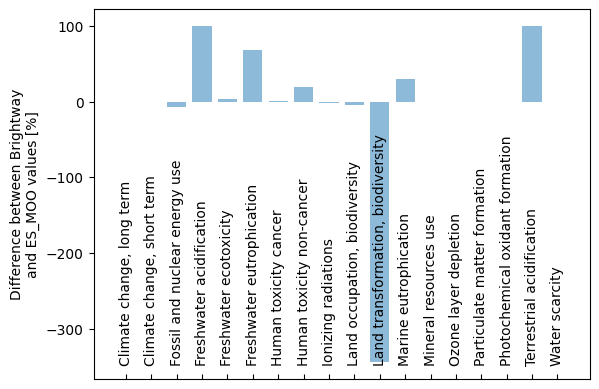

In [67]:
plot_comparison_bis(wind_impacts_midpoints, save=False)

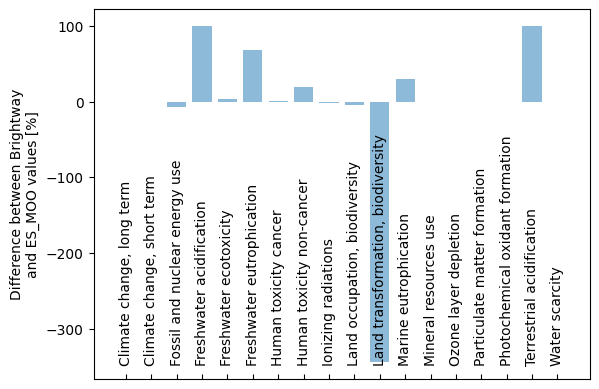

In [68]:
plot_comparison_bis(wind_impacts_midpoints_wo_direct, save=False)

## Finding where the problem comes from

In [213]:
Em_wind = pd.DataFrame(Em[wind_id])
Em_wind.index.rename("uuid", inplace=True)
Em_wind = Em_wind.loc[~(Em_wind==0).all(axis=1)]
#display(Em_wind)

In [214]:
Em_wind_full = pd.merge(left=df_eco_str, right=Em_wind, left_index=True, right_index=True)
Em_wind_full.drop(labels='id', inplace=True, axis=1)
Em_wind_full.rename(columns={wind_id:"wind_ES_moo"}, inplace=True)
display(Em_wind_full)

,name,comp,subcomp,unit,wind_ES_moo
uuid,,,,,
38a622c6-f086-4763-a952-7c6b3b1c42ba,"1,4-Butanediol",air,urban air close to ground,kg,1.215795e-05
541a823c-0aad-4dc4-9123-d4af4647d942,1-Pentanol,air,urban air close to ground,kg,1.485647e-06
8cbaa905-41b0-4327-8403-bf1c8eb25429,1-Pentene,air,urban air close to ground,kg,1.020527e-05
5e98fd60-8da0-4006-9729-4d2797f96302,"2,2,4-Trimethyl pentane",air,unspecified,kg,7.822162e-08
e6137e6e-84a6-4fa1-a5bf-47c8153d7c05,"2,4-D",air,non-urban air or from high stacks,kg,2.627456e-05
...,...,...,...,...,...
79b3f708-dd3f-4ccb-9121-a4cdd46e0dc4,o-Dichlorobenzene,water,surface water,kg,5.628465e-02
1b279330-0469-4d04-9fe2-4e9a38011f0c,o-Xylene,water,unspecified,kg,8.788767e-04
77fd3c56-5c3e-4070-93fa-de03fa455d47,t-Butyl methyl ether,water,surface water,kg,3.211336e-06


In [215]:
def replace_empty_str(x):
    if x == "":
        return "unspecified"
    else:
        return x

In [216]:
wind_bw_inventory = pd.read_csv("../ES_MOO_validation/AB_results/WT-2-MW_Inventory.csv")

In [217]:
wind_bw_inventory[['comp', 'subcomp']] = wind_bw_inventory['categories'].str.split(',', 1, expand=True)
wind_bw_inventory['comp'] = wind_bw_inventory['comp'].map(lambda x: x.lstrip("('").rstrip("')"))
wind_bw_inventory['subcomp'] = wind_bw_inventory['subcomp'].map(lambda x: x.lstrip(" '").rstrip("')"))
wind_bw_inventory['subcomp'] = wind_bw_inventory['subcomp'].apply(lambda x: replace_empty_str(x))
wind_bw_inventory.drop(labels=["Unnamed: 0", "categories", "type", "database"], axis=1, inplace=True)
wind_bw_inventory.rename(columns={"wind turbine construction,\n2MW, onshore | wind turbine,\n2MW, onshore | GLO |\necoinvent3.8 cut-off":"wind_bw"}, inplace=True)
display(wind_bw_inventory)

C:\Users\matth\AppData\Local\Temp\ipykernel_19952\3668283535.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  wind_bw_inventory[['comp', 'subcomp']] = wind_bw_inventory['categories'].str.split(',', 1, expand=True)


,name,unit,wind_bw,comp,subcomp
0,"1,4-Butanediol",kilogram,1.215795e-05,air,urban air close to ground
1,1-Pentanol,kilogram,1.485647e-06,air,urban air close to ground
2,1-Pentene,kilogram,1.020527e-05,air,urban air close to ground
3,"2,4-D",kilogram,1.506479e-02,soil,agricultural
4,2-Aminopropanol,kilogram,1.524032e-06,air,urban air close to ground
...,...,...,...,...,...
1962,Beta-cyfluthrin,kilogram,2.000375e-04,soil,agricultural
1963,Thiophanate-methyl,kilogram,1.659608e-03,soil,agricultural
1964,Triallate,kilogram,8.309041e-09,soil,agricultural
1965,Fluorochloridone,kilogram,9.031170e-28,soil,agricultural


In [218]:
Em_wind_full = pd.merge(left=Em_wind_full, right=wind_bw_inventory, on=["name", "comp", "subcomp"], how="outer")

In [219]:
display(Em_wind_full)

,name,comp,subcomp,unit_x,wind_ES_moo,unit_y,wind_bw
0,"1,4-Butanediol",air,urban air close to ground,kg,1.215795e-05,kilogram,1.215795e-05
1,1-Pentanol,air,urban air close to ground,kg,1.485647e-06,kilogram,1.485647e-06
2,1-Pentene,air,urban air close to ground,kg,1.020527e-05,kilogram,1.020527e-05
3,"2,2,4-Trimethyl pentane",air,unspecified,kg,7.822162e-08,kilogram,7.822162e-08
4,"2,4-D",air,non-urban air or from high stacks,kg,2.627456e-05,kilogram,2.627456e-05
...,...,...,...,...,...,...,...
2077,o-Dichlorobenzene,water,surface water,kg,5.628465e-02,kilogram,5.628468e-02
2078,o-Xylene,water,unspecified,kg,8.788767e-04,kilogram,8.788767e-04
2079,t-Butyl methyl ether,water,surface water,kg,3.211336e-06,kilogram,3.211335e-06
2080,t-Butyl methyl ether,water,unspecified,kg,7.348321e-04,kilogram,7.348321e-04


In [220]:
number_of_digits = 4
Em_wind_full.wind_bw = Em_wind_full.wind_bw.apply(lambda x: float(f'%.{number_of_digits}g' % x))
Em_wind_full.wind_ES_moo = Em_wind_full.wind_ES_moo.apply(lambda x: float(f'%.{number_of_digits}g' % x))

In [221]:
Em_wind_full_differences = Em_wind_full[Em_wind_full.wind_ES_moo != Em_wind_full.wind_bw]

In [243]:
Em_wind_full_differences["delta"] = Em_wind_full_differences.wind_bw / Em_wind_full_differences.wind_ES_moo

C:\Users\matth\AppData\Local\Temp\ipykernel_19952\3287550945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Em_wind_full_differences["delta"] = Em_wind_full_differences.wind_bw / Em_wind_full_differences.wind_ES_moo


In [244]:
display(Em_wind_full_differences)

,name,comp,subcomp,unit_x,wind_ES_moo,unit_y,wind_bw,delta
6,"2,4-D ester",air,non-urban air or from high stacks,kg,3.615000e-14,kilogram,3.616000e-14,1.000277
7,"2,4-DB",air,non-urban air or from high stacks,kg,3.414000e-14,kilogram,3.415000e-14,1.000293
211,Deltamethrin,air,"low population density, long-term",kg,2.558000e-18,NaN,NaN,NaN
214,Dichlorodimethylsilane,air,unspecified,kg,-7.148000e-14,NaN,NaN,NaN
218,Diethylene glycol,air,urban air close to ground,kg,7.115000e-11,kilogram,6.758000e-11,0.949824
...,...,...,...,...,...,...,...,...
2032,Triethylammonium,water,unspecified,kg,1.072000e-15,NaN,NaN,NaN
2036,Trifloxystrobin,water,ground-,kg,6.518000e-16,kilogram,2.732000e-17,0.041915
2038,Trifluralin,water,ground-,kg,2.141000e-16,NaN,NaN,NaN
2040,Trioctyltin,water,ocean,kg,9.583000e-20,kilogram,3.655000e-22,0.003814


In [245]:
Em_wind_full_differences[Em_wind_full_differences.name.str.contains("Transformation")]

,name,comp,subcomp,unit_x,wind_ES_moo,unit_y,wind_bw,delta
903,"Transformation, from annual crop, greenhouse",natural resource,land,m2,6.241000e-17,NaN,NaN,NaN
937,"Transformation, from traffic area, road network",natural resource,land,m2,1.155000e-12,square meter,2.978000e-15,0.002578
940,"Transformation, from urban, continuously built",natural resource,land,m2,-1.267000e-09,NaN,NaN,NaN
941,"Transformation, from urban, green area",natural resource,land,m2,-5.744000e-10,NaN,NaN,NaN
944,"Transformation, to annual crop, greenhouse",natural resource,land,m2,6.241000e-17,NaN,NaN,NaN
959,"Transformation, to forest, secondary (non-use)",natural resource,land,m2,1.361000e-12,square meter,3.508000e-15,0.002578
962,"Transformation, to grassland, natural, for liv...",natural resource,land,m2,2.752000e-07,square meter,2.753000e-07,1.000363
985,"Transformation, to urban, continuously built",natural resource,land,m2,5.149000e-09,NaN,NaN,NaN
988,"Transformation, to wetland, inland (non-use)",natural resource,land,m2,4.309000e-12,square meter,1.111000e-14,0.002578


In [262]:
Em_wind_full_differences[Em_wind_full_differences.delta <= 0]

,name,comp,subcomp,unit_x,wind_ES_moo,unit_y,wind_bw,delta
797,"Fish, demersal, in ocean",natural resource,biotic,kg,-1.643000e-11,kilogram,1.183000e-22,-7.200243e-12
1666,"Discarded fish, demersal, to ocean",water,ocean,kg,-1.651000e-13,kilogram,1.479000e-23,-8.958207e-11
1953,"Solids, inorganic",water,ocean,kg,1.078000e-14,kilogram,-1.928000e-16,-1.788497e-02


In [264]:
Em_wind_full_differences.delta.abs().min(), Em_wind_full_differences.delta.max()

(7.200243457090689e-12, 1.0003633720930232)

The flows with the term "(non-use)" are not important because their characterization factor will be zero in IW+. However, here there is a big issue in row 937 (Transformation, from traffic area, road network) for which there is a 1000 factor difference, and the characterization factor in IW+ is -1.0611.

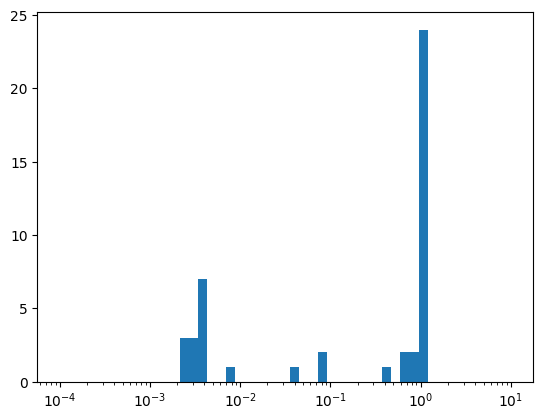

In [266]:
values_diff = Em_wind_full_differences.loc[~Em_wind_full_differences.wind_bw.isnull()].delta
plt.hist(values_diff, bins=np.logspace(np.log10(1e-4),np.log10(10), 50))
plt.xscale("log")
plt.show()

In [227]:
# Number of differences between ecospold2matrix and brightway
Em_wind_full_differences.shape[0]

164

In [223]:
# Number of differences due to the fact that the flow is present in ecospold2matrix but absent in bw, the rest being a difference of values
Em_wind_full_differences.wind_bw.isnull().sum()

115

In [224]:
# All the flows present in bw are also present in ecospold2matrix
Em_wind_full_differences.wind_ES_moo.isnull().sum()

0

In [228]:
Em_wind.shape[0], wind_bw_inventory.shape[0]

(2082, 1967)